# Midterm Project: Predicting Sectoral Productivity Trends in New Zealand (1978–2023)

### Exploratory Data Analysis (EDA) for Predicting Sectoral Productivity Trends in New Zealand
This section details the exploratory data analysis process for the dataset, focusing on understanding the data structure, identifying potential issues, and visualizing trends. The EDA process includes mistakes and discoveries as part of the journey.

### Step 1: Load and Inspect the Data
We start by loading the dataset and conducting basic checks, such as the structure, column names, and missing values.

In [12]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

# Load the dataset
data = pd.read_csv('https://www.stats.govt.nz/assets/Uploads/Productivity-statistics/Productivity-statistics-1978-2023/Download-data/productivity-statistics-1978-2023.csv')

# Check the structure and missing values
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15186 entries, 0 to 15185
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Series_reference  15186 non-null  object 
 1   Period            15186 non-null  float64
 2   Data_value        15186 non-null  float64
 3   STATUS            15186 non-null  object 
 4   UNITS             15186 non-null  object 
 5   MAGNTUDE          15186 non-null  int64  
 6   Subject           15186 non-null  object 
 7   Group             15186 non-null  object 
 8   Series_title_1    15186 non-null  object 
 9   Series_title_2    14610 non-null  object 
 10  Series_title_3    14610 non-null  object 
 11  Series_title_4    0 non-null      float64
 12  Series_title_5    0 non-null      float64
dtypes: float64(4), int64(1), object(8)
memory usage: 1.5+ MB


,Series_reference,Period,Data_value,STATUS,UNITS,MAGNTUDE,Subject,Group,Series_title_1,Series_title_2,Series_title_3,Series_title_4,Series_title_5
0,PRDA.S1CAAZI,1978.03,1000.0,FINAL,Index,0,Productivity Statistics - PRD,Productivity Indexes - Industry Level (ANZSIC06),Capital,"Agriculture, Forestry and Fishing",Index,NaN,NaN
1,PRDA.S1CAAZI,1979.03,947.0,FINAL,Index,0,Productivity Statistics - PRD,Productivity Indexes - Industry Level (ANZSIC06),Capital,"Agriculture, Forestry and Fishing",Index,NaN,NaN
2,PRDA.S1CAAZI,1980.03,1054.0,FINAL,Index,0,Productivity Statistics - PRD,Productivity Indexes - Industry Level (ANZSIC06),Capital,"Agriculture, Forestry and Fishing",Index,NaN,NaN
3,PRDA.S1CAAZI,1981.03,1167.0,FINAL,Index,0,Productivity Statistics - PRD,Productivity Indexes - Industry Level (ANZSIC06),Capital,"Agriculture, Forestry and Fishing",Index,NaN,NaN
4,PRDA.S1CAAZI,1982.03,1144.0,FINAL,Index,0,Productivity Statistics - PRD,Productivity Indexes - Industry Level (ANZSIC06),Capital,"Agriculture, Forestry and Fishing",Index,NaN,NaN


### Step 2: Handle Missing Values
We found that the columns `Series_title_2` and `Series_title_3` had missing values. We decided to handle them by filling `Series_title_2` and `Series_title_3` with 'Unknown' for now.

In [13]:
# Handle missing values
data['Series_title_2'].fillna('Unknown', inplace=True)
data['Series_title_3'].fillna('Unknown', inplace=True)

C:\Users\T-bao\AppData\Local\Temp\ipykernel_4244\1562600341.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Series_title_2'].fillna('Unknown', inplace=True)
C:\Users\T-bao\AppData\Local\Temp\ipykernel_4244\1562600341.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For

### Step 3: Distribution of `Data_value`
We plotted the distribution of the target variable, `Data_value`, to understand its range and frequency.

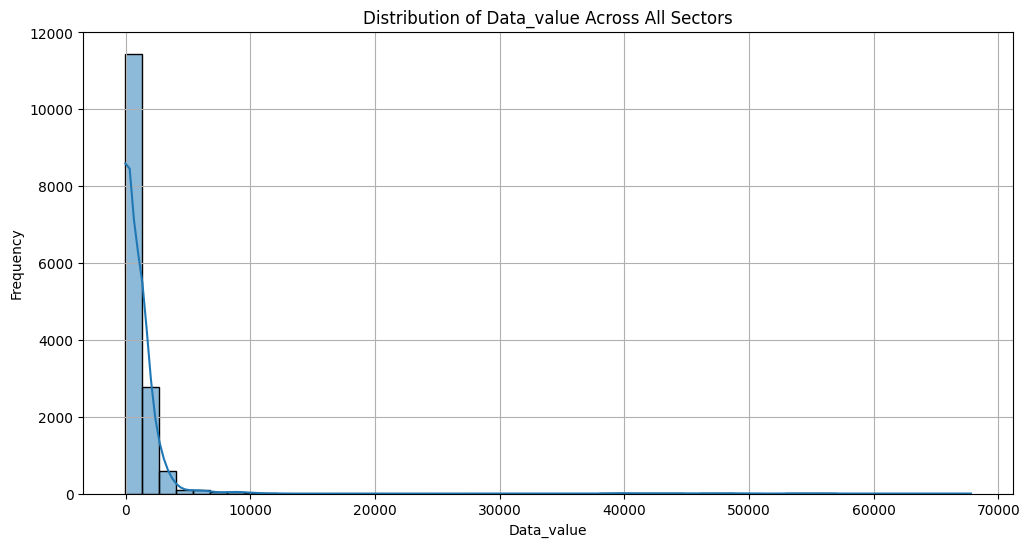

In [14]:
# Plot the distribution of the target variable
plt.figure(figsize=(12, 6))
sns.histplot(data['Data_value'], bins=50, kde=True)
plt.title("Distribution of Data_value Across All Sectors")
plt.xlabel("Data_value")
plt.ylabel("Frequency")
plt.grid()
plt.show()

Those are some very large numbers on the righthand tail. Let us take a closer look. 

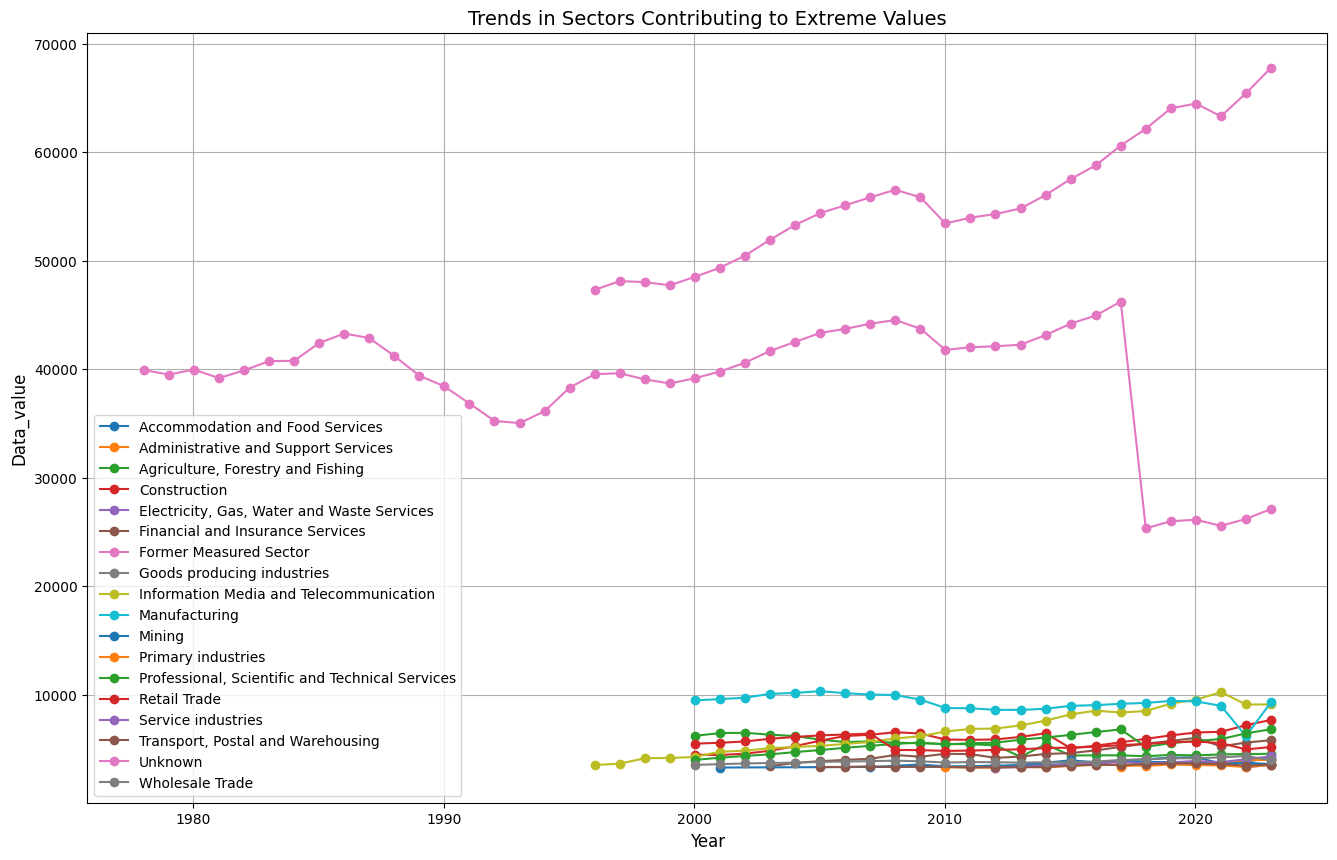

,Series_reference,Period,Data_value,STATUS,UNITS,MAGNTUDE,Subject,Group,Series_title_1,Series_title_2,Series_title_3,Series_title_4,Series_title_5
1840,PRDA.S1LAAZI,2013.03,3314.0,REVISED,Index,0,Productivity Statistics - PRD,Productivity Indexes - Industry Level (ANZSIC06),Labour,"Agriculture, Forestry and Fishing",Index,NaN,NaN
1842,PRDA.S1LAAZI,2015.03,3323.0,REVISED,Index,0,Productivity Statistics - PRD,Productivity Indexes - Industry Level (ANZSIC06),Labour,"Agriculture, Forestry and Fishing",Index,NaN,NaN
1843,PRDA.S1LAAZI,2016.03,3459.0,REVISED,Index,0,Productivity Statistics - PRD,Productivity Indexes - Industry Level (ANZSIC06),Labour,"Agriculture, Forestry and Fishing",Index,NaN,NaN
1844,PRDA.S1LAAZI,2017.03,3519.0,REVISED,Index,0,Productivity Statistics - PRD,Productivity Indexes - Industry Level (ANZSIC06),Labour,"Agriculture, Forestry and Fishing",Index,NaN,NaN
1845,PRDA.S1LAAZI,2018.03,3393.0,FINAL,Index,0,Productivity Statistics - PRD,Productivity Indexes - Industry Level (ANZSIC06),Labour,"Agriculture, Forestry and Fishing",Index,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12315,PRDA.S3RKK1I,2023.03,5413.0,PROVISIONAL,Index,0,Productivity Statistics - PRD,Productivity Input Series - Industry Level (AN...,Ratio (used in the capital-labour ratio),Financial and Insurance Services,Index,NaN,NaN
14118,PRDA.S3TKK1I,2021.03,3360.0,REVISED,Index,0,Productivity Statistics - PRD,Productivity Input Series - Industry Level (AN...,Total,Financial and Insurance Services,Index,NaN,NaN
14119,PRDA.S3TKK1I,2022.03,3578.0,REVISED,Index,0,Productivity Statistics - PRD,Productivity Input Series - Industry Level (AN...,Total,Financial and Insurance Services,Index,NaN,NaN
14120,PRDA.S3TKK1I,2023.03,3682.0,PROVISIONAL,Index,0,Productivity Statistics - PRD,Productivity Input Series - Industry Level (AN...,Total,Financial and Insurance Services,Index,NaN,NaN


In [15]:
# Step 1: Calculate IQR and detect extreme values
Q1 = data['Data_value'].quantile(0.25)
Q3 = data['Data_value'].quantile(0.75)
IQR = Q3 - Q1

# Define the upper outlier threshold
upper_bound = Q3 + 1.5 * IQR

# Extract rows with extreme values
extreme_values = data[data['Data_value'] > upper_bound]

# Step 2: Analyze extreme values by sector
sector_analysis = extreme_values.groupby(['Series_title_2', 'Period'])['Data_value'].mean().reset_index()

# Step 3: Visualize the sectors contributing to extreme values
plt.figure(figsize=(16, 10))
for sector in sector_analysis['Series_title_2'].unique():
    sector_data = sector_analysis[sector_analysis['Series_title_2'] == sector]
    plt.plot(sector_data['Period'], sector_data['Data_value'], marker='o', label=sector)

plt.title("Trends in Sectors Contributing to Extreme Values", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Data_value", fontsize=12)
plt.legend()
plt.grid()
plt.show()

from IPython.display import display

display(extreme_values)



"Unknown " & "Former Measured Sector" are clearly unblancing the data here, let's resolve that. 

Remaining Sectors After Cleaning:
['Agriculture, Forestry and Fishing' 'Mining' 'Manufacturing'
 'Electricity, Gas, Water and Waste Services' 'Construction'
 'Wholesale Trade' 'Retail Trade' 'Accommodation and Food Services'
 'Transport, Postal and Warehousing'
 'Information Media and Telecommunication'
 'Financial and Insurance Services'
 'Rental, Hiring and Real Estate Services'
 'Professional, Scientific and Technical Services'
 'Administrative and Support Services' 'Education and Training'
 'Health Care and Social Assistance' 'Arts and Recreation Services'
 'Other Services' 'Goods producing industries' 'Primary industries'
 'Service industries']
Top Sectors with Extreme Data_value After Cleaning:
                                     Series_title_2   Data_value
8                                     Manufacturing  9153.760000
7           Information Media and Telecommunication  6847.160377
3                                      Construction  5995.848485
11  Professional, Scientific a

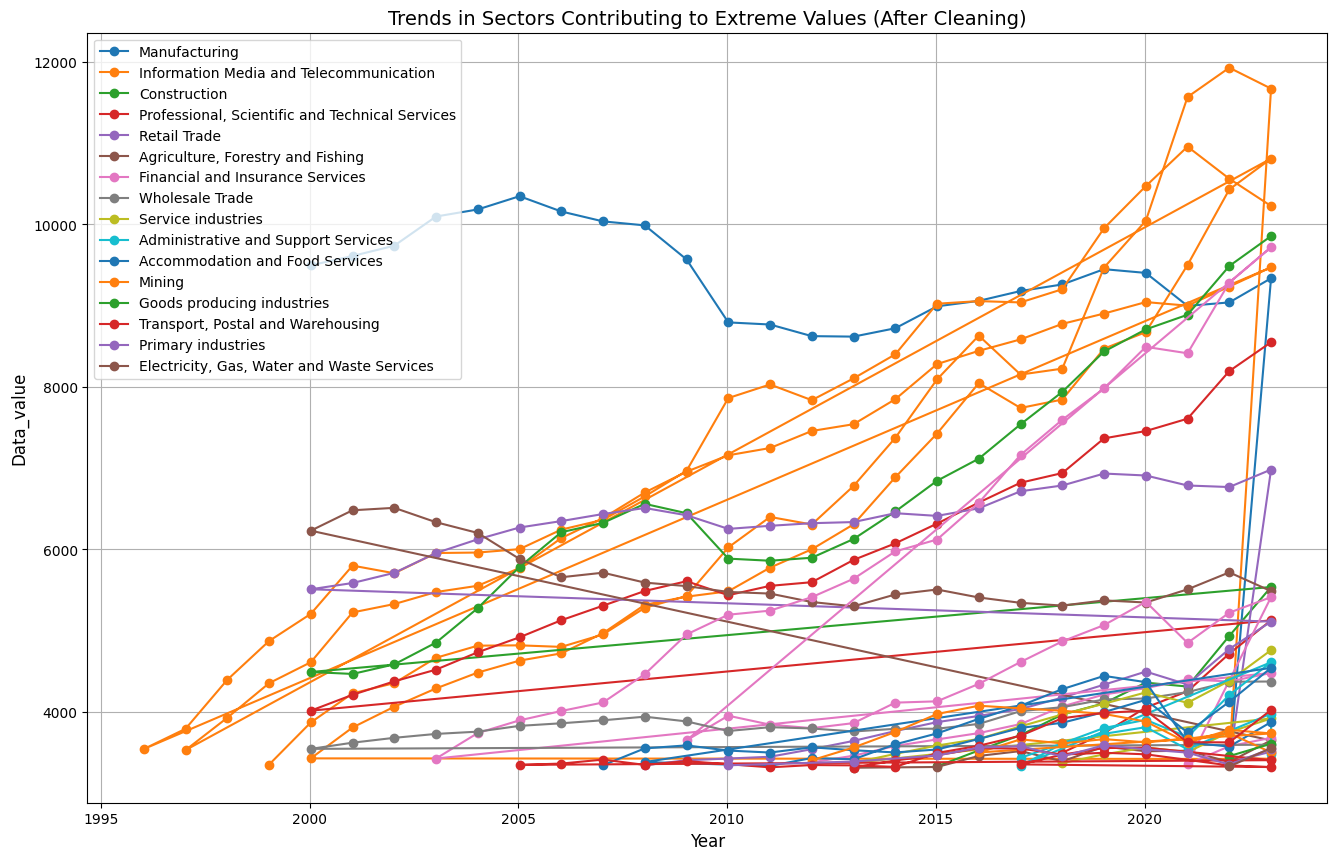

In [16]:
# Step 1: Remove "Unknown" and "Former Measured Sector"
data_cleaned = data[~data['Series_title_2'].isin(['Unknown', 'Former Measured Sector'])]

# Confirm the cleaned data no longer contains these sectors
print("Remaining Sectors After Cleaning:")
print(data_cleaned['Series_title_2'].unique())

# Step 2: Recalculate extreme values in the cleaned dataset
Q1 = data_cleaned['Data_value'].quantile(0.25)
Q3 = data_cleaned['Data_value'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR

# Extract new extreme values
extreme_values_cleaned = data_cleaned[data_cleaned['Data_value'] > upper_bound]

# Reanalyze top sectors in the cleaned dataset
sector_avg_cleaned = extreme_values_cleaned.groupby("Series_title_2")["Data_value"].mean().reset_index()
sector_avg_cleaned_sorted = sector_avg_cleaned.sort_values(by="Data_value", ascending=False)

# Display the top sectors in the cleaned data
print("Top Sectors with Extreme Data_value After Cleaning:")
print(sector_avg_cleaned_sorted.head(5))

# Step 3: Visualize the top sectors with extreme values after cleaning
plt.figure(figsize=(16, 10))
for sector in sector_avg_cleaned_sorted['Series_title_2'].unique():
    sector_data = extreme_values_cleaned[extreme_values_cleaned['Series_title_2'] == sector]
    plt.plot(sector_data['Period'], sector_data['Data_value'], marker='o', label=sector)

plt.title("Trends in Sectors Contributing to Extreme Values (After Cleaning)", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Data_value", fontsize=12)
plt.legend()
plt.grid()
plt.show()


Is looking more normal now, no one sector is massively sticking out as a very abnormal outlier any longer. 

### Step 4: Initial Trend Analysis
We plotted the average productivity trends over time for the 'Capital' sector. However, we noticed an unusual spike in the data for the year 1978, which raised questions about potential data issues.

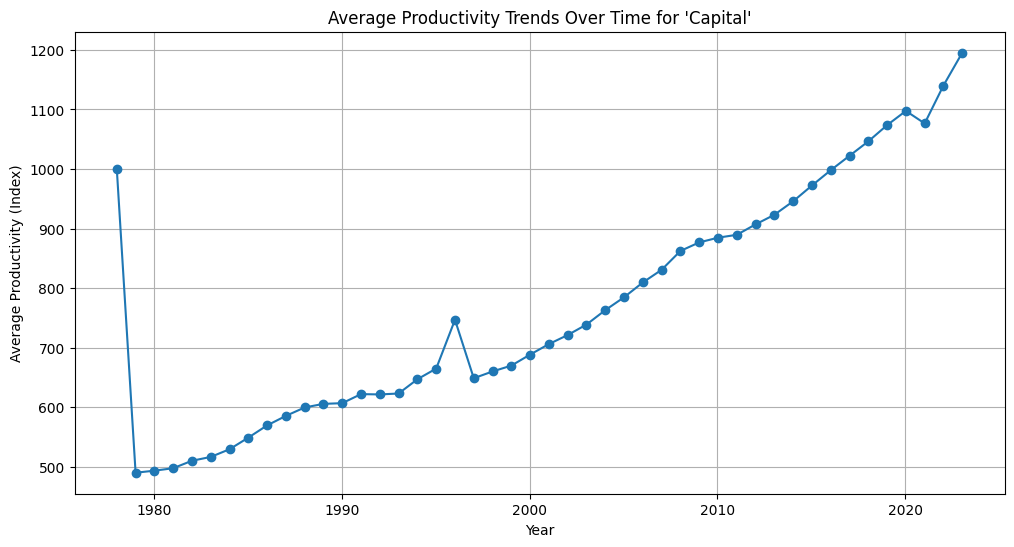

In [17]:
# Filter data for the 'Capital' sector
capital_sector = data[data['Series_title_1'] == 'Capital']

# Group by Period and calculate average Data_value
capital_sector_grouped = capital_sector.groupby('Period')['Data_value'].mean()

# Plot the trends
plt.figure(figsize=(12, 6))
plt.plot(capital_sector_grouped.index, capital_sector_grouped.values, marker='o')
plt.title("Average Productivity Trends Over Time for 'Capital'")
plt.xlabel("Year")
plt.ylabel("Average Productivity (Index)")
plt.grid()
plt.show()

### Step 5: Investigate Data Issues
Upon investigating the early years (1978–1980), we discovered:
- `Data_value` for 1978 was unusually high in certain sub-sectors (e.g., Agriculture and Mining).
- The dataset includes different units (`Index` and `Percentage Change`) in `Series_title_3`, which were incorrectly averaged together.

We decided to:
1. Filter the data to include only rows where `Series_title_3` is 'Index'.
2. Group the data by `Series_title_2` (sector) to analyze trends within each sector.

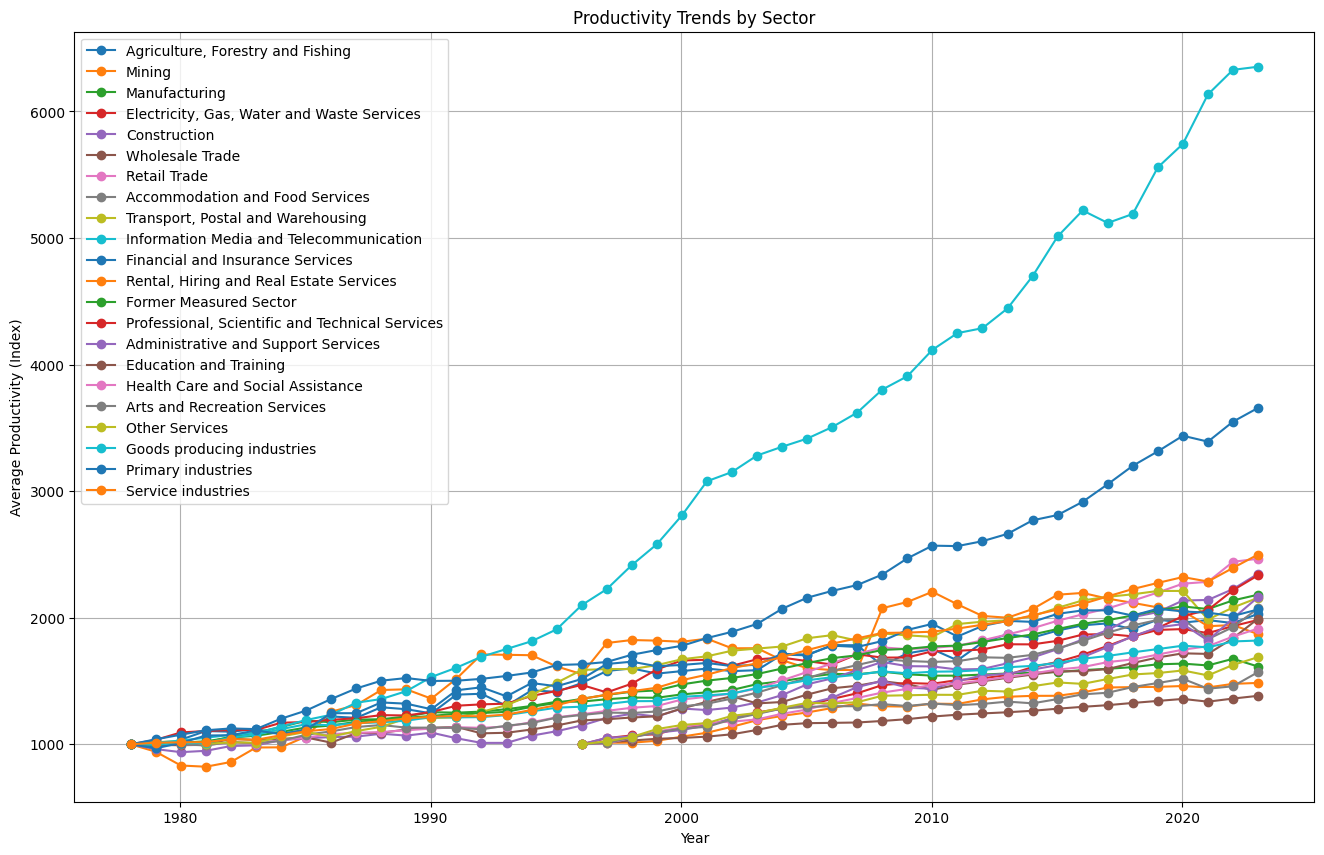

In [18]:
# Filter data to include only rows where Series_title_3 is 'Index'
filtered_data = data[data['Series_title_3'] == 'Index']

# Group by sector and calculate average trends
sectors = filtered_data['Series_title_2'].unique()

plt.figure(figsize=(16, 10))
for sector in sectors: 
    sector_data = filtered_data[filtered_data['Series_title_2'] == sector]
    sector_grouped = sector_data.groupby('Period')['Data_value'].mean()
    plt.plot(sector_grouped.index, sector_grouped.values, marker='o', label=sector)
plt.title("Productivity Trends by Sector")
plt.xlabel("Year")
plt.ylabel("Average Productivity (Index)")
plt.legend()
plt.grid()
plt.show()

Now you can see there are no issues with the initial values for 1978 on this graph once the data has been cleaned up and separated out.
Is interesting to note the strongest growth we see here is for the "Information Media and Telecommunications" industry sector, but this isn't too surprising and almost to be expected, so a good/normal result so far with how the data is behaving.

### Conclusions from EDA
- **Initial Issues Identified**:
  1. High values in early periods (e.g., 1978) caused anomalies.
  2. Mixing of `Index` and `Percentage Change` values in `Series_title_3` led to incorrect averages.
- **Adjustments Made**:
  - Filtered the data to include only rows where `Series_title_3` was 'Index'.
  - Grouped data by `Series_title_2` (sector) to analyze trends more effectively.



### Step 6: Correlation Analysis
We explored correlations between numerical features in the dataset using a heatmap.

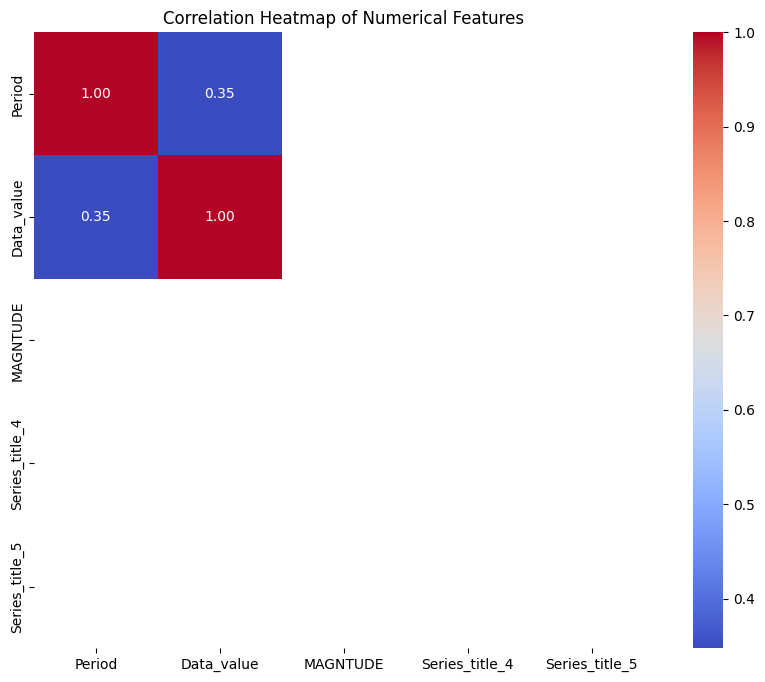

In [21]:
# Correlation heatmap
numerical_columns = filtered_data.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = filtered_data[numerical_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

### Step 7: Feature Importance Analysis
To identify key drivers of productivity, we used a simple linear regression model. This step also helped prepare for future predictive modeling tasks.


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: C:\Users\T-bao\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


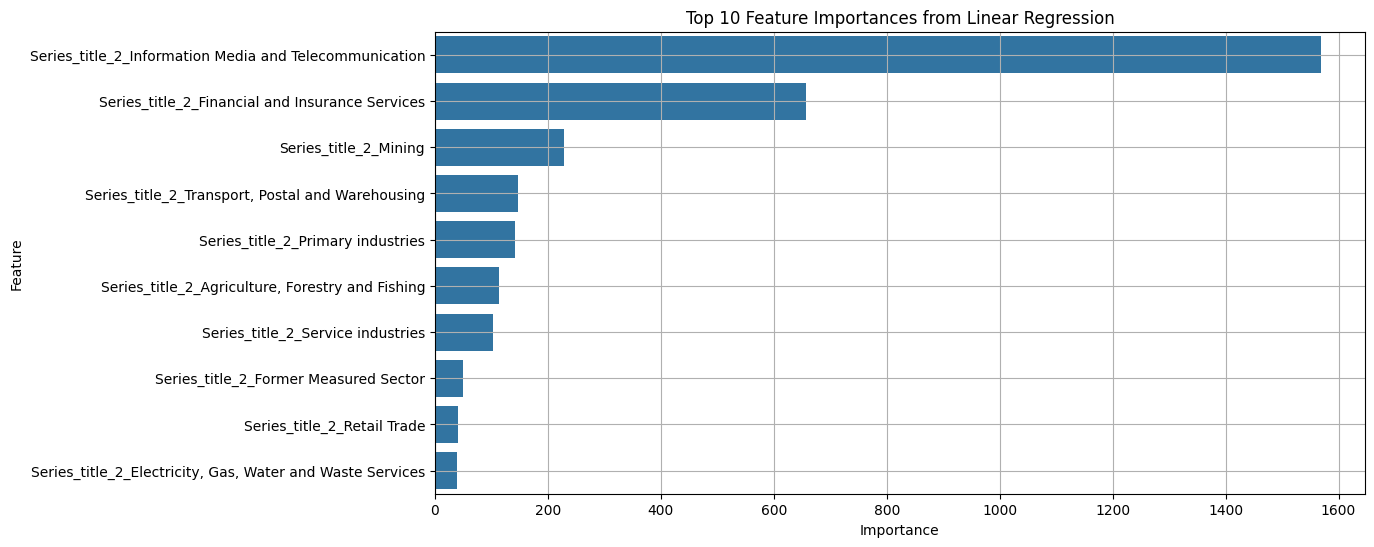

In [26]:
!pip install --upgrade scikit-learn

# Prepare data for linear regression
X = filtered_data[['Period', 'Series_title_2']]
y = filtered_data['Data_value']

# One-hot encode categorical features
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
X_encoded = encoder.fit_transform(X[['Series_title_2']])

# Combine encoded features with 'Period'
X_encoded_df = pd.DataFrame(X_encoded, columns=encoder.get_feature_names_out(['Series_title_2']))
X_encoded_df['Period'] = X['Period'].reset_index(drop=True)

# Ensure all column names are strings
X_encoded_df.columns = X_encoded_df.columns.astype(str)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded_df, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Feature importance
importance = pd.DataFrame({
    'Feature': X_encoded_df.columns.tolist(),
    'Importance': model.coef_
}).sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=importance.head(10))
plt.title("Top 10 Feature Importances from Linear Regression")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.grid()
plt.show()
